In [10]:
import os

from matplotlib import pyplot as plt
import mne
import mne_bids

In [2]:
def get_all_files(path, suffix, get_bids=False, prefix=None, bids_root=None):
    """Return all files in all (sub-)directories of path with given suffixes and prefixes (case-insensitive).

    Args:
        path (string)
        suffix (iterable): e.g. ["vhdr", "edf"] or [".json"]
        get_bids (boolean): True if BIDS_Path type should be returned instead of string. Default: False
        bids_root (string/path): Path of BIDS root folder. Only required if get_bids=True.
        prefix (iterable): e.g. ["SelfpacedRota", "ButtonPress] (optional)

    Returns:
        filepaths (list of strings or list of BIDS_Path)
    """
    filepaths = []
    for root, dirs, files in os.walk(path):
        for file in files:
            for suff in suffix:
                if file.endswith(suff.lower()):
                    if prefix is not None:
                        for pref in list(prefix):
                            if pref.lower() in file.lower():
                                filepaths.append(os.path.join(root, file))
                    else:
                        filepaths.append(os.path.join(root, file))
    if not filepaths:
        print("No files found.")
    if get_bids:
        bids_paths = []
        for filepath in filepaths:
            subject, session, task, run = get_subject_sess_task_run(filepath)
            bids_path = mne_bids.BIDSPath(subject=subject, session=session, task=task, run=run, datatype="ieeg",
                                          root=bids_root)
            bids_paths.append(bids_path)
        return bids_paths
    else:
        return filepaths
    
    
def get_subject_sess_task_run(vhdr_file):
    """ Given a BIDS-conform filename return the corresponding subject, session, task and run.

    Args:
        vhdr_file (string): Name of file
    Return:
        subject, sess, task, run (strings)
    """

    subject = vhdr_file[vhdr_file.rfind('sub-') + 4:vhdr_file.rfind('ses') - 1]

    str_sess = vhdr_file[vhdr_file.rfind('ses'):]
    sess = str_sess[str_sess.find('-') + 1:str_sess.find('_')]

    str_task = vhdr_file[vhdr_file.rfind('task'):]
    task = str_task[str_task.find('-') + 1:str_task.find('run') - 1]

    str_run = vhdr_file[vhdr_file.rfind('run'):]
    run = min(str_run[str_run.find('-') + 1:str_run.find('_')], str_run[str_run.find('-') + 1:str_run.find('.')])

    return subject, sess, task, run


### Define root folder

In [3]:
root = "/Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin"

### Get BIDS_path object (mne_bids) from data files in root that start with prefix "selfp"

In [4]:
ieeg_files = get_all_files(root, suffix=[".vhdr", ".edf"], get_bids=True, bids_root=root, prefix=["Selfp"])
for idx, ieeg_file in enumerate(ieeg_files):
    print(idx, ':', os.path.basename(ieeg_file))

0 : sub-002_ses-20200131_task-SelfpacedRotationR+MedOn+StimOff_run-4_ieeg.vhdr
1 : sub-002_ses-20200201_task-SelfpacedRotationR+MedOff+StimOn_run-3_ieeg.vhdr
2 : sub-002_ses-20200201_task-selfpacedrotationSTIMOFF_run-2_ieeg.vhdr
3 : sub-004_ses-20200730_task-RotaSelfpaceOFFLeftRefSTNR1_run-15_ieeg.vhdr
4 : sub-004_ses-20200730_task-RotaSelfpaceOFFRefSTNR1_run-16_ieeg.vhdr
5 : sub-004_ses-20200730_task-SelfpacedRotationL+MedOn+StimOff_run-9_ieeg.vhdr
6 : sub-004_ses-20200730_task-OnRotaSelfpR2xLTRefSTNR1_run-8_ieeg.vhdr
7 : sub-003_ses-20201107_task-SelfpacedOnRefSTNR110010001_run-1_ieeg.vhdr
8 : sub-001_ses-20171014_task-selfpacedforcewheelON_run-0_ieeg.vhdr


# EXAMPLE No. 1 OUT OF 2 - STIMULATION OFF

### Pick file to update

In [5]:
bids_file = ieeg_files[0]
bids_file

BIDSPath(
root: /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin
datatype: ieeg
basename: sub-002_ses-20200131_task-SelfpacedRotationR+MedOn+StimOff_run-4)

### Define dictionary used for updating .json sidecar file

In [7]:
update_dict = {
  "InstitutionName": "Department of Neurology, Universitaetsmedizin Charite",
  "InstitutionAddress": "Chariteplatz 1, 10117 Berlin, Germany",
  "Manufacturer": "Alpha Omega Engineering Ltd.",
  "ManufacturersModelName": "Neuro Omega",
  "TaskDescription": "Selfpaced rotations",
  "Instructions": "Perform 30 to 50 wrist rotations with an interval of about 10 seconds. Do not count in between rotations.",
  "iEEGReference": "n/a",
  "SoftwareFilters": "n/a",
  "HardwareFilters": "n/a",
  "iEEGGround": "n/a",
  "iEEGPlacementScheme": "left supplementary motor area ECoG strip and bilateral STN DBS electrodes",
  "iEEGElectrodeGroups": {"ECOG_strip": "1x6 grid on left supplementary motora area", 
                          "DBS_left": "1x8 electrode in STN", 
                          "DBS_right": "1x8 electrode in STN"},
  "SubjectArtefactDescription": "n/a",
  "ElectricalStimulation": False
}

### Plot data to determine which electrode was used for reference

Extracting parameters from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200131/ieeg/sub-002_ses-20200131_task-SelfpacedRotationR+MedOn+StimOff_run-4_ieeg.vhdr...
Setting channel info structure...
Reading events from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200131/ieeg/sub-002_ses-20200131_task-SelfpacedRotationR+MedOn+StimOff_run-4_events.tsv.
Reading channel info from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200131/ieeg/sub-002_ses-20200131_task-SelfpacedRotationR+MedOn+StimOff_run-4_channels.tsv.
Reading electrode coords from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200131/ieeg/sub-0

<ipython-input-8-ed08e814b35f>:2: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['ANALOG_ROT_R_1']
  raw = mne_bids.read_raw_bids(bids_file, verbose=False)
<ipython-input-8-ed08e814b35f>:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw = mne_bids.read_raw_bids(bids_file, verbose=False)


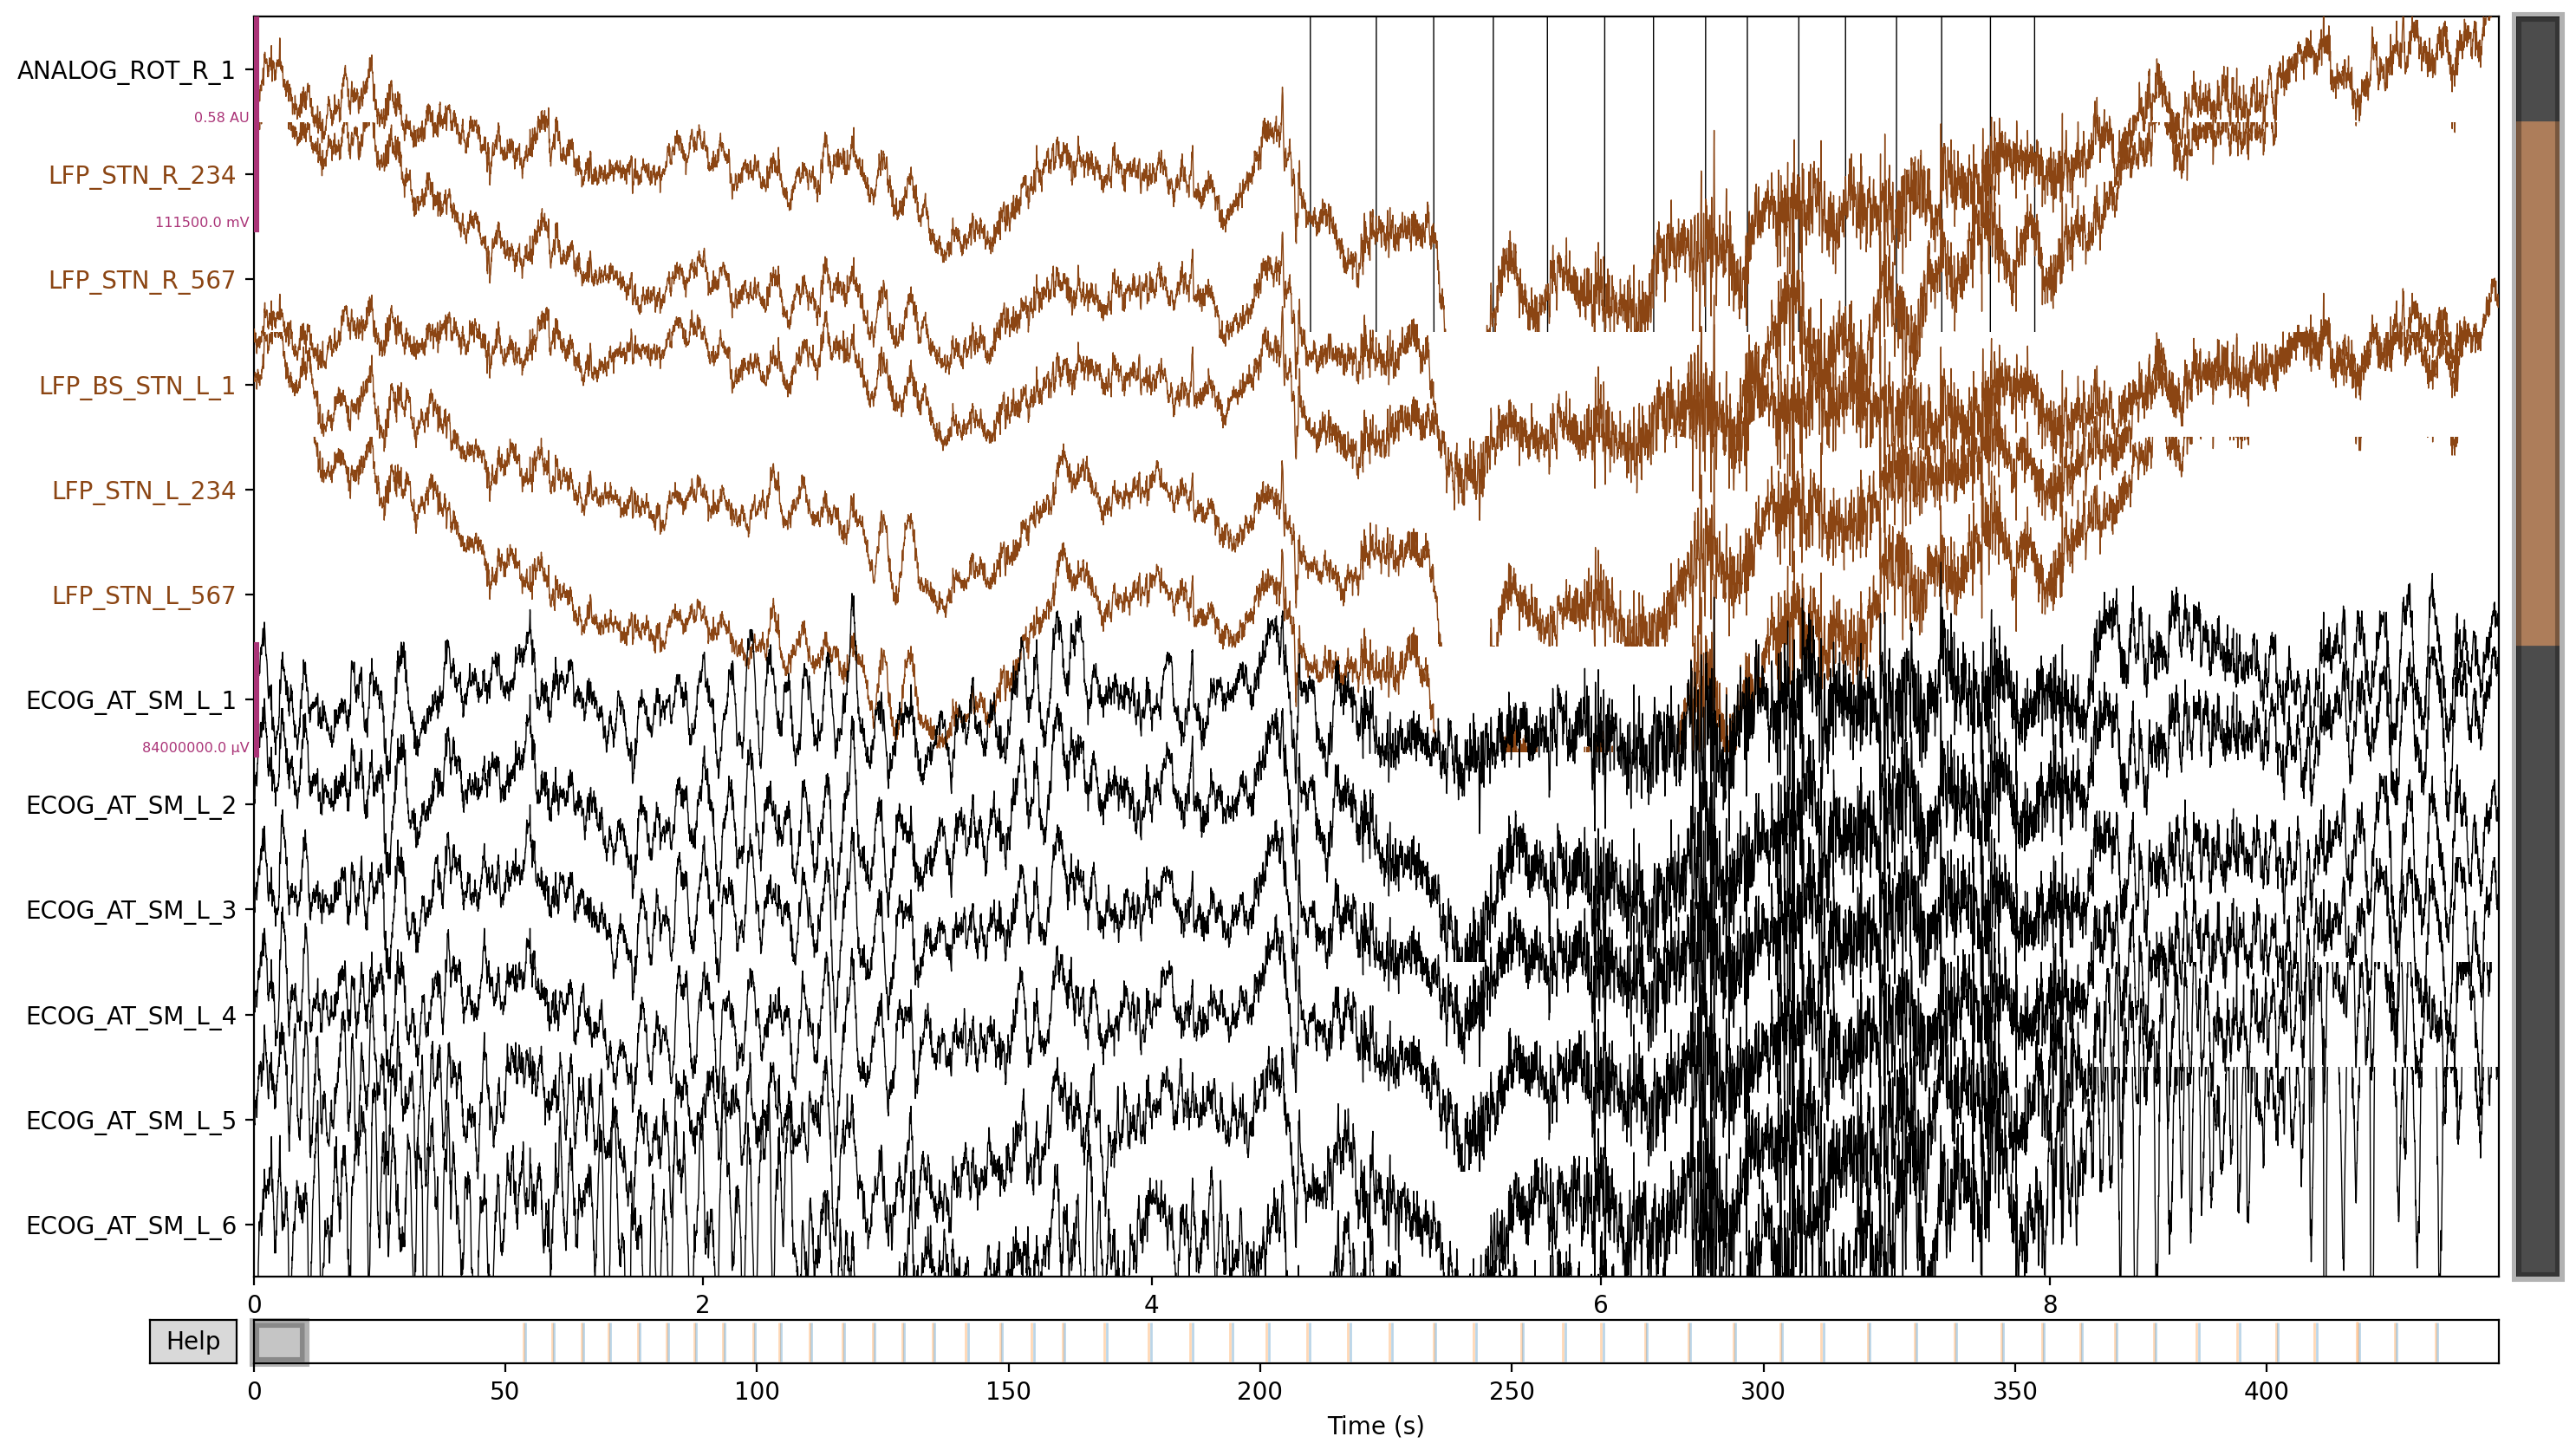

Channels marked as bad: none


In [8]:
%matplotlib qt
raw = mne_bids.read_raw_bids(bids_file, verbose=False)
raw.plot(scalings="auto", decim='auto')

### LFP_STN_BS_R_1 was used as reference but not included in recording

### So let's create an empty reference channel and set it's datatype in our raw data

In [50]:
ref_channel = 'LFP_BS_STN_R_1'
ref_channel_type = 'seeg'
raw.load_data()
mne.add_reference_channels(raw, ref_channels=[ref_channel], copy=False)
raw.set_channel_types({"LFP_BS_STN_R_1": 'seeg'})

Reading 0 ... 613327  =      0.000 ...   446.056 secs...


<ipython-input-50-c98c21dc1640>:4: RuntimeWarning: The locations of multiple reference channels are ignored (set to zero).
  mne.add_reference_channels(raw, ref_channels=[ref_channel], copy=False)


<RawBrainVision | sub-002_ses-20200131_task-SelfpacedRotationR+MedOn+StimOff_run-4_ieeg.eeg, 13 x 613328 (446.1 s), ~60.9 MB, data loaded>

### Check if it worked

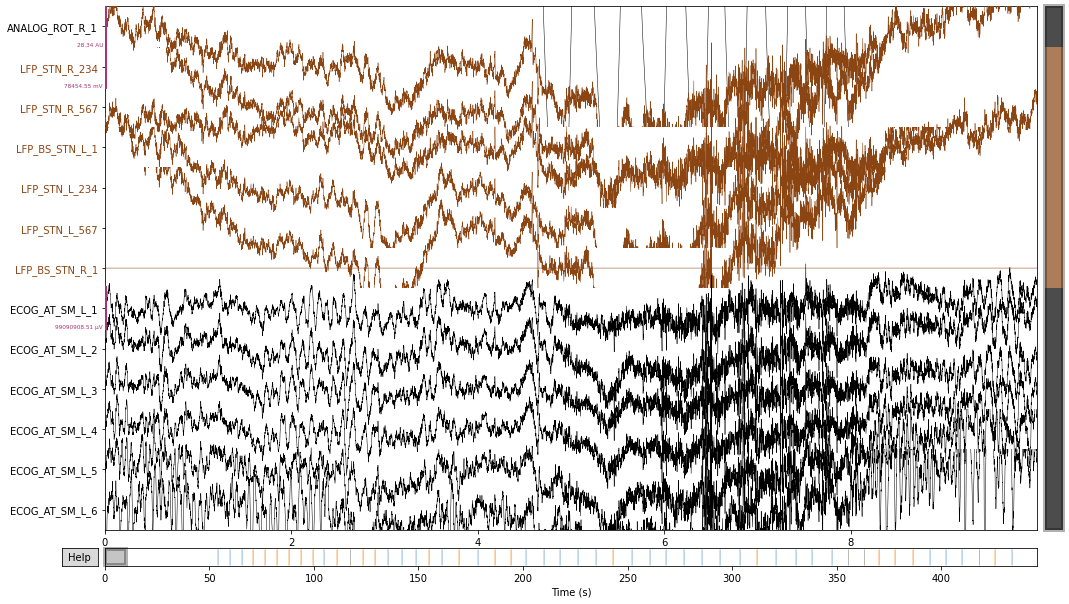

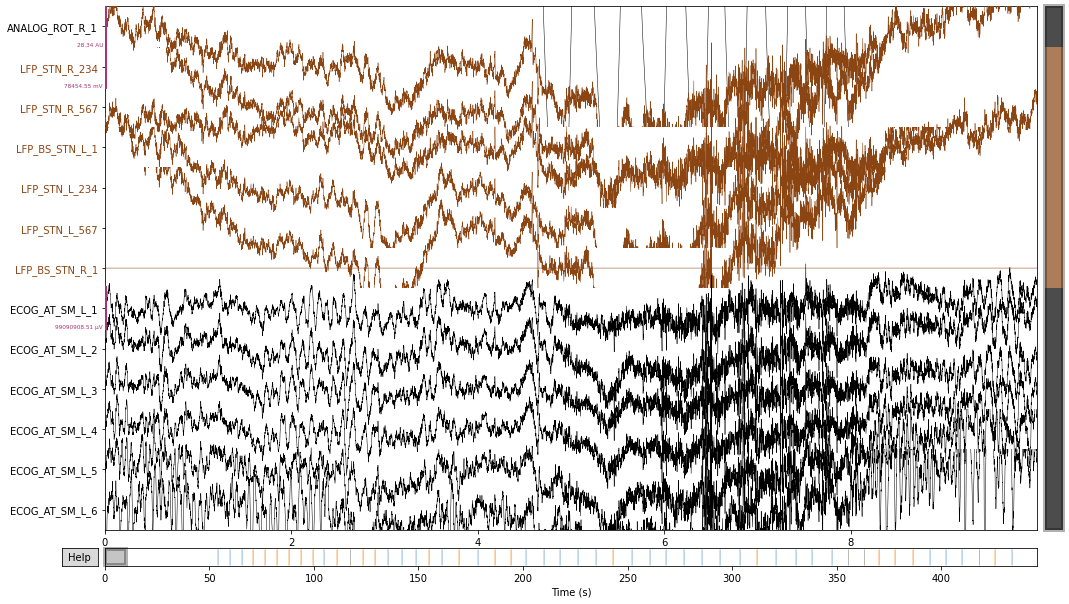

In [51]:
%matplotlib inline
raw.plot(scalings="auto", decim='auto')

### UPDATE the dictionary

In [52]:
update_dict["iEEGReference"] = "LFP_BS_STN_R_1"

### Now update the sidecar .json file

In [53]:
mne_bids.update_sidecar_json(bids_file.copy().update(suffix='ieeg', extension='.json'), update_dict, verbose=True)


Writing '/Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200131/ieeg/sub-002_ses-20200131_task-SelfpacedRotationR+MedOn+StimOff_run-4_ieeg.json'...

{
    "TaskName": "SelfpacedRotationR+MedOn+StimOff",
    "Manufacturer": "Alpha Omega Engineering Ltd.",
    "PowerLineFrequency": 50,
    "SamplingFrequency": 1375.0,
    "SoftwareFilters": "n/a",
    "RecordingDuration": 446.056,
    "RecordingType": "continuous",
    "iEEGReference": "LFP_BS_STN_R_1",
    "ECOGChannelCount": 6,
    "SEEGChannelCount": 5,
    "EEGChannelCount": 0,
    "EOGChannelCount": 0,
    "ECGChannelCount": 0,
    "EMGChannelCount": 0,
    "MiscChannelCount": 1,
    "TriggerChannelCount": 0,
    "InstitutionName": "Department of Neurology, Universitaetsmedizin Charite",
    "InstitutionAddress": "Chariteplatz 1, 10117 Berlin, Germany",
    "ManufacturersModelName": "Neuro Omega",
    "TaskDescription": "Selfpaced rotati

# EXAMPLE No. 2 OUT OF 2 - STIMULATION ON

### Pick file to update

In [54]:
bids_file = ieeg_files[1]
bids_file

BIDSPath(
root: /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin
datatype: ieeg
basename: sub-002_ses-20200201_task-SelfpacedRotationR+MedOff+StimOn_run-3)

### Define dictionary used for updating .json sidecar file

In [55]:
update_dict = {
  "InstitutionName": "Department of Neurology, Universitaetsmedizin Charite",
  "InstitutionAddress": "Chariteplatz 1, 10117 Berlin, Germany",
  "Manufacturer": "Alpha Omega Engineering Ltd.",
  "ManufacturersModelName": "Neuro Omega",
  "TaskDescription": "Selfpaced rotations",
  "Instructions": "Perform 30 to 50 wrist rotations with an interval of about 10 seconds. Do not count in between rotations.",
  "iEEGReference": "n/a",
  "SoftwareFilters": "n/a",
  "HardwareFilters": "n/a",
  "iEEGGround": "n/a",
  "iEEGPlacementScheme": "left supplementary motor area ECoG strip and bilateral STN DBS electrodes",
  "iEEGElectrodeGroups": {"ECOG_strip": "1x6 grid on left supplementary motora area", "DBS_left": "1x8 electrode in STN", "DBS_right": "1x8 electrode in STN"},
  "SubjectArtefactDescription": "n/a",
  "ElectricalStimulation": True,
  "ElectricalStimulationParameters": "Bipolar stimulation: STN L1-L8. Parameters: ?? Hz, 0.8 mA continous (cDBS)"
}

### Plot data to determine which electrode was used for reference

Extracting parameters from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200201/ieeg/sub-002_ses-20200201_task-SelfpacedRotationR+MedOff+StimOn_run-3_ieeg.vhdr...
Setting channel info structure...
Reading events from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200201/ieeg/sub-002_ses-20200201_task-SelfpacedRotationR+MedOff+StimOn_run-3_events.tsv.
Reading channel info from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200201/ieeg/sub-002_ses-20200201_task-SelfpacedRotationR+MedOff+StimOn_run-3_channels.tsv.
Reading electrode coords from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200201/ieeg/sub-0

<ipython-input-56-ed08e814b35f>:2: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['EEG_TM_Cz__1', 'EEG_TM_Fz__1', 'EMG_TM_BR_1', 'EMG_TM_BR_2', 'EMG_TM_FDI_1', 'EMG_TM_FDI_2', 'ANALOG_ROTA_R_1']
  raw = mne_bids.read_raw_bids(bids_file, verbose=False)
<ipython-input-56-ed08e814b35f>:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw = mne_bids.read_raw_bids(bids_file, verbose=False)


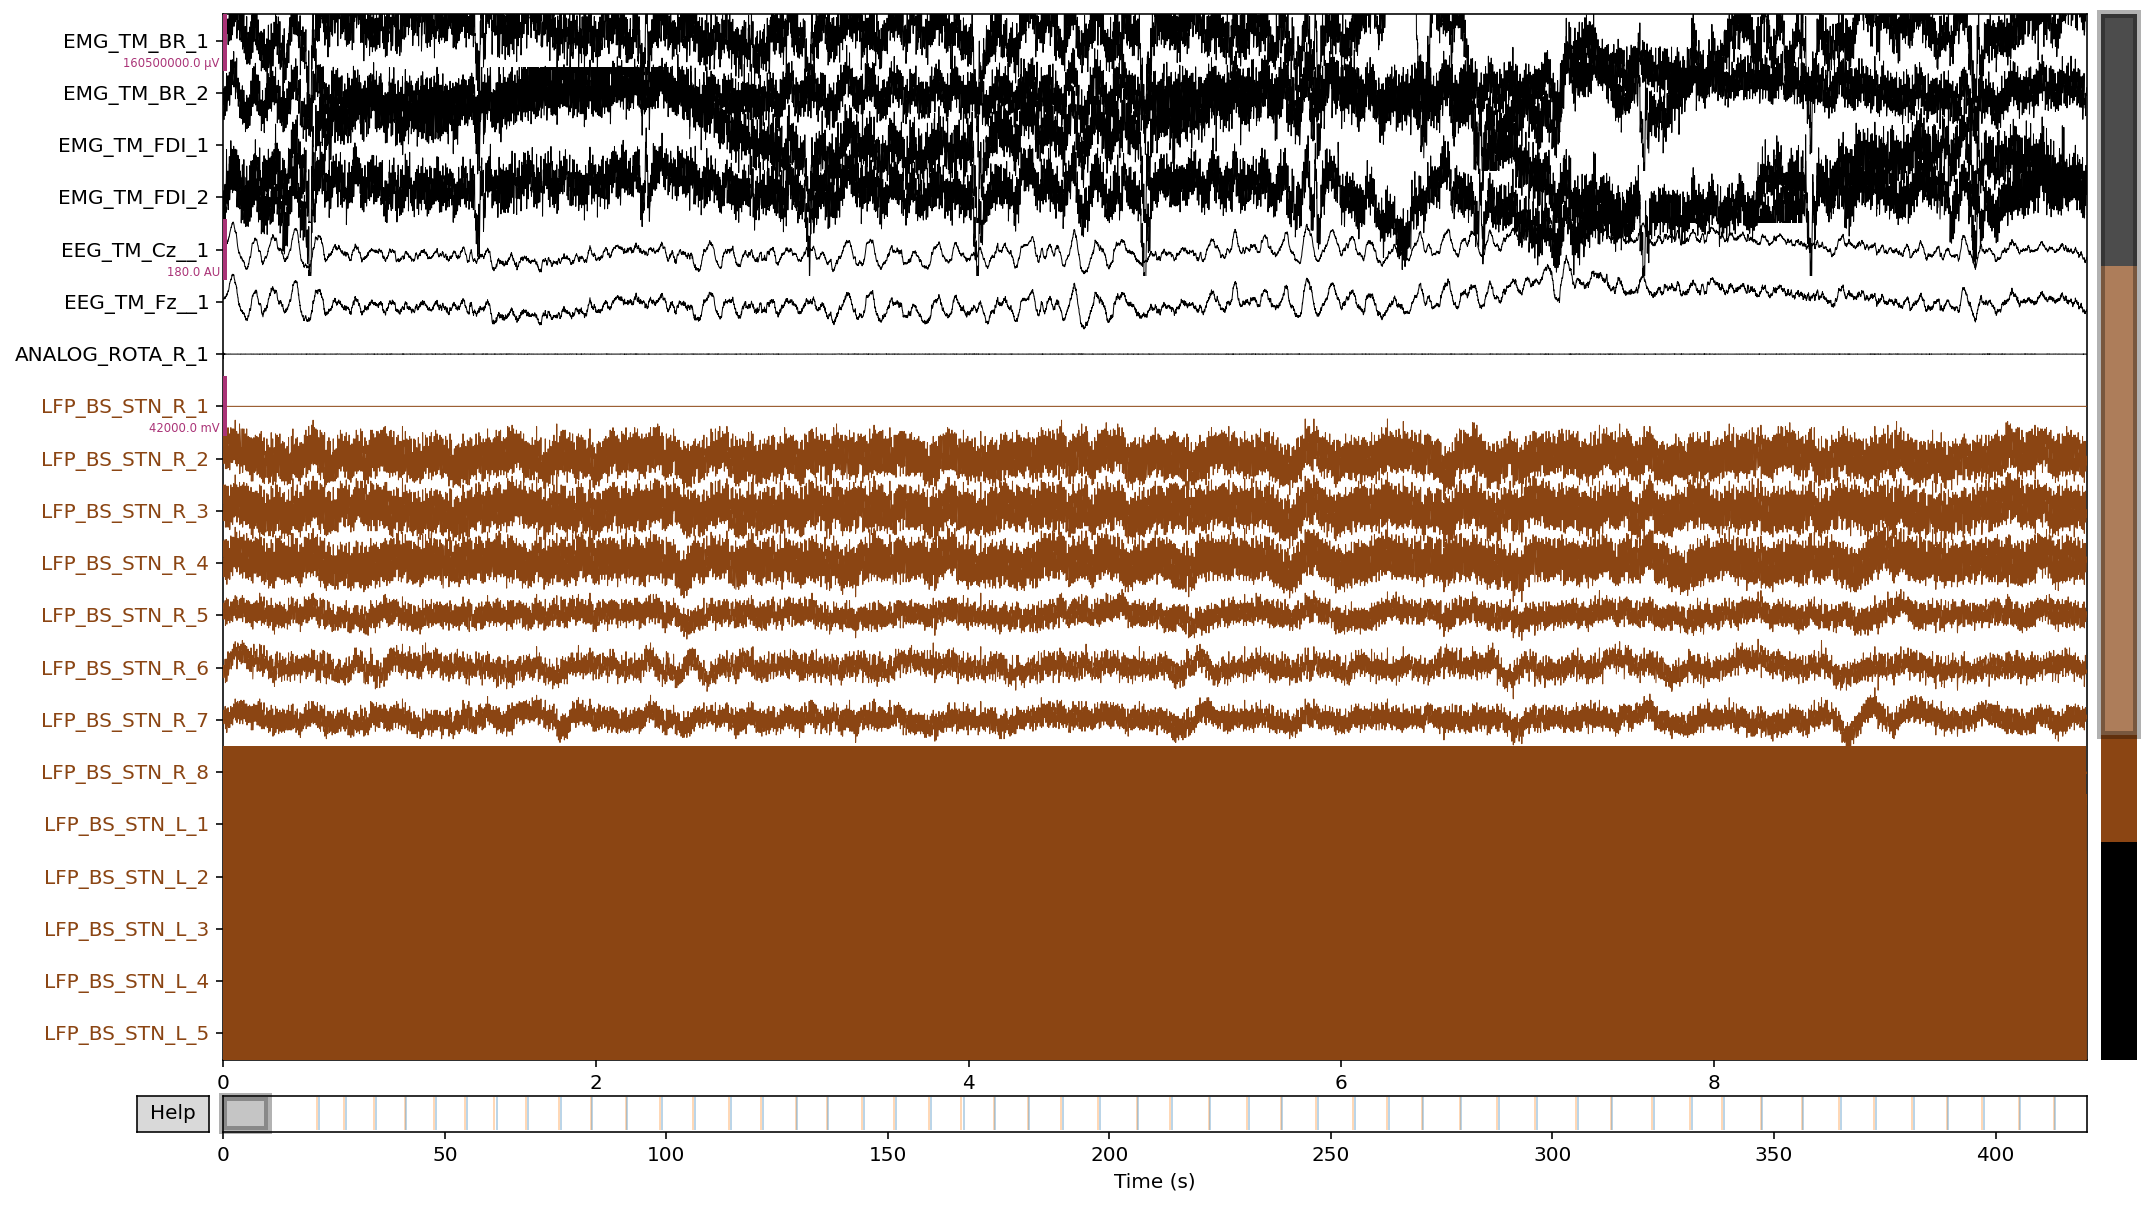

Channels marked as bad: none


In [56]:
%matplotlib qt
raw = mne_bids.read_raw_bids(bids_file, verbose=False)
raw.plot(scalings="auto", decim='auto')

### Evidently, LFP_BS_STN_R_1 was reference

In [57]:
ref_channel = "LFP_BS_STN_R_1"
update_dict["iEEGReference"] = ref_channel

### Now update the sidecar .json file

In [58]:
mne_bids.update_sidecar_json(bids_file.copy().update(suffix='ieeg', extension='.json'), update_dict, verbose=True)


Writing '/Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200201/ieeg/sub-002_ses-20200201_task-SelfpacedRotationR+MedOff+StimOn_run-3_ieeg.json'...

{
    "TaskName": "SelfpacedRotationR+MedOff+StimOn",
    "Manufacturer": "Alpha Omega Engineering Ltd.",
    "PowerLineFrequency": 50,
    "SamplingFrequency": 1375.515818431912,
    "SoftwareFilters": "n/a",
    "RecordingDuration": 420.560776,
    "RecordingType": "continuous",
    "iEEGReference": "LFP_BS_STN_R_1",
    "ECOGChannelCount": 6,
    "SEEGChannelCount": 16,
    "EEGChannelCount": 0,
    "EOGChannelCount": 0,
    "ECGChannelCount": 0,
    "EMGChannelCount": 4,
    "MiscChannelCount": 3,
    "TriggerChannelCount": 0,
    "InstitutionName": "Department of Neurology, Universitaetsmedizin Charite",
    "InstitutionAddress": "Chariteplatz 1, 10117 Berlin, Germany",
    "ManufacturersModelName": "Neuro Omega",
    "TaskDescription": "S